In [23]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from math import exp
from scipy.optimize import leastsq
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x, y)
    plt.xscale('log')
    plt.show

* A = 0.0482
* B = 1.16
* C = 159
* D = 2.39

4-parameter logistic equation. A, B, C, and D were generated by Softmax Pro.
Y = D + (A - D)/(1 + (x/C)^B)

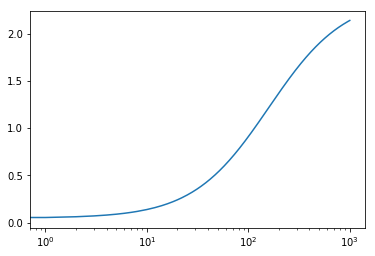

In [24]:
graph('2.39 + (0.0482 - 2.39)/(1 + (x/159)**1.16)', range(0, 1000))

* 0, 0.047
* 13, 0.175
* 52, 0.552
* 210, 1.408
* 840, 2.093

In [25]:
x = [0.001, 13, 52, 210, 840]
y = [0.047, 0.175, 0.552, 1.408, 2.093]

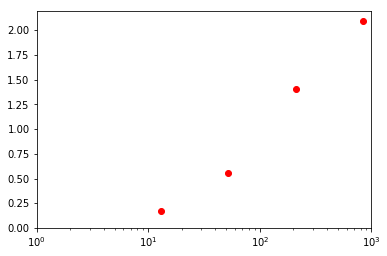

In [26]:
plt.plot(x, y, 'ro')
plt.xscale('log')
plt.axis([1, 1000, 0, 2.2])
plt.show()

    I think the first thing I need to do is try to learn how to draw a best fit line when the X is on logarithmic scale, and when the X and Y axis' are both on a logarithmic scale. This is probably a good first aproximation.


In [69]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)
    plt.xscale('log')
    plt.show

def logistic4(A, B, C, D, x):
    """4PL logistic equation."""
    return D + (A-D)/(1 + (x/C)**B)

def residuals(p, y, x):
    """Deviations of data from fitted 4PL curve"""
    A,B,C,D = p
    err = y-logistic4(A, B, C, D, x)
    return err

x = [0.001, 13, 52, 210, 840]
y = [0.047, 0.175, 0.552, 1.408, 2.093]

# Initial guess for parameters
p0 = [0.01, 0.01, 0.01, 0.01]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, x))
formula = 

graph(logistic4, range(0, 1000))

# Plot results
#plt.plot(x,y, 'ro')
#plt.title('Least-squares 4PL fit to noisy data')
#plt.legend(['Fit', 'Noisy', 'True'], loc='upper left')
#for i, (param, actual, est) in enumerate(zip('ABCD', [A,B,C,D], plsq[0])):
#    plt.text(10, 3-i*0.5, '%s = %.2f, est(%s) = %.2f' % (param, actual, param, est))

TypeError: logistic4() missing 4 required positional arguments: 'B', 'C', 'D', and 'x'

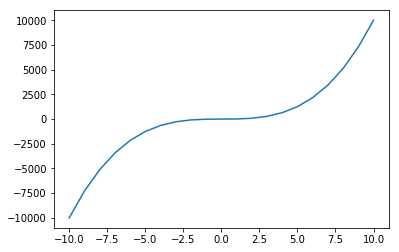

In [70]:
import numpy as np  
import matplotlib.pyplot as plt  

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    z = 10
    return z*x**3+2*x-4

graph(my_formula, range(-10, 11))